In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR="/mnt/Archivos/data"

In [3]:
from eapprocessor.tools.load import load_neo, load_count_evaluation

In [4]:
noise_levels = [5, 25, 50, 100, 200, 300]
resolution = 12
fs=20000

In [5]:
neo_list=[]
neo_files=[]
for noise_level in noise_levels:
    neo_dict, file = load_neo(f"{BASE_DIR}/output/preprocessor", verbose=True, resolution=resolution, 
                       noise_level=noise_level, fs=fs)
    neo_list += [neo_dict]
    neo_files += [file]

Search for pattern: *_12_5uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_5uV_20000Hz_2021-10-04_12-19.h5
Search for pattern: *_12_25uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_25uV_20000Hz_2021-10-04_12-20.h5
Search for pattern: *_12_50uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_50uV_20000Hz_2021-10-04_12-20.h5
Search for pattern: *_12_100uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_100uV_20000Hz_2021-10-04_12-20.h5
Search for pattern: *_12_200uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_200uV_20000Hz_2021-10-04_12-21.h5
Search for pattern: *_12_300uV_20000Hz*
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_300uV_20000Hz_2021-10-04_12-21.h5


In [6]:
test_neo = neo_list[0]

In [7]:
from eapprocessor.plot.signals import plot_signals

In [34]:
%matplotlib inline

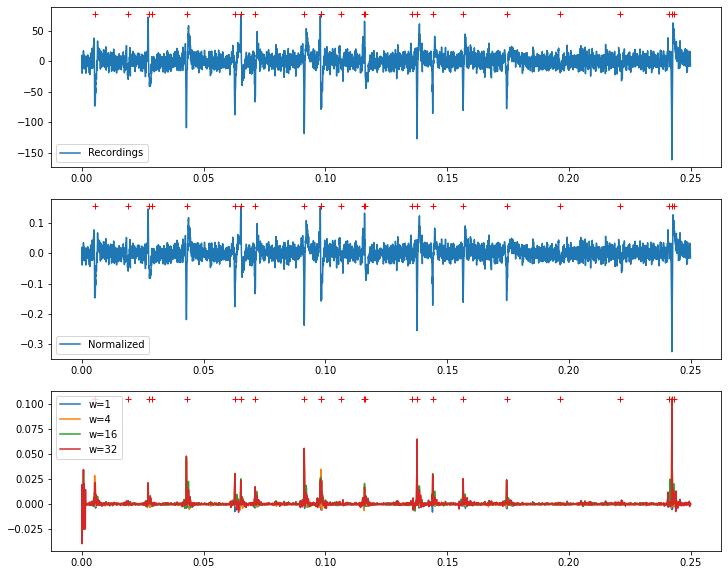

In [35]:
plot_signals(test_neo,channels=[27],crange=range(5000))

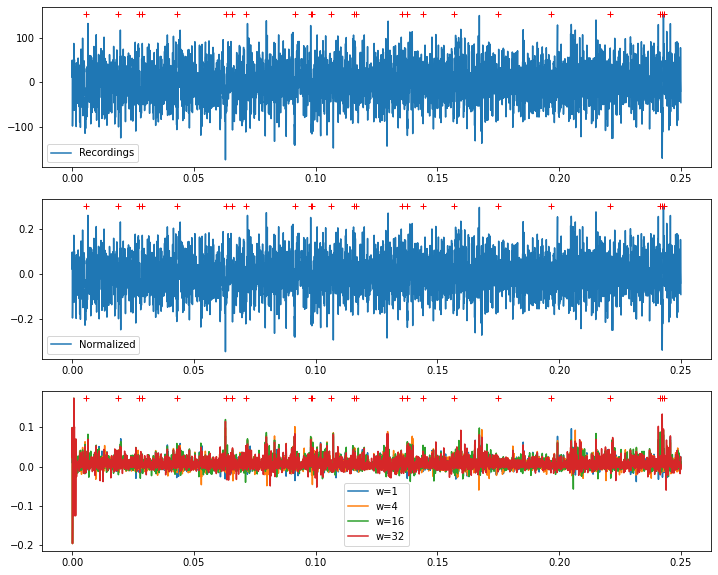

In [36]:
plot_signals(neo_list[1],channels=[27],crange=range(5000))

In [12]:
from eapprocessor.plot.positions import plot_electrodes_axons

In [13]:
%matplotlib widget
import matplotlib.pylab as plt 

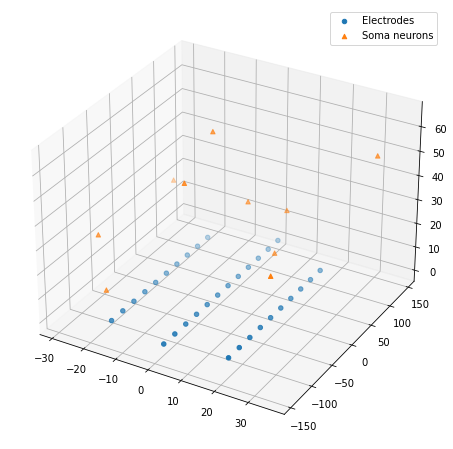

In [37]:
plot_electrodes_axons(test_neo["recordings"])

In [15]:
from eapprocessor.tools.distances import calc_distances_from_recordings, get_order_by_channels, \
    convert_distances_to_intensity

In [16]:
distances = calc_distances_from_recordings(test_neo["recordings"])
print(distances)
print(distances.shape)

[[137.81984019  28.04628114 225.98408857  70.50292347  72.83271594
  189.50371178  33.95021476 155.82803798 129.50082791 226.93162199]
 [116.62453196  50.15762653 202.70426256  61.57571822  85.24483708
  165.2228901   35.87114953 131.91497697 106.08310161 202.08148815]
 [ 97.25355809  74.12813982 179.88670832  62.14882084 102.36581454
  141.19330738  51.6803798  108.49306373  83.58698741 177.27350237]
 [ 81.02609251  98.61123023 157.73217047  71.99571369 122.23271953
  117.56911451  72.83532071  85.96469395  63.00749544 152.5282316 ]
 [ 70.15839774 123.30193973 136.56371176  88.0584445  143.71122246
   94.65433599  95.85982594  65.26187504  46.93724001 127.88208721]
 [ 67.29913729 148.09646166 116.91816429 107.58808719 166.17759535
   73.11901229 119.67969133  48.76777688  41.06415124 103.40597188]
 [ 73.39037394 172.95015342  99.69988422 129.01977896 189.28040293
   54.61992854 143.90048924  41.8028682   49.18764616  79.25756628]
 [ 86.5628101  197.8407167   86.37289322 151.54870577 2

In [17]:
orders = get_order_by_channels(distances)
orders

array([[1, 6, 3, 4, 8, 0, 7, 5, 2, 9],
       [6, 1, 3, 4, 8, 0, 7, 5, 9, 2],
       [6, 3, 1, 8, 0, 4, 7, 5, 9, 2],
       [8, 3, 6, 0, 7, 1, 5, 4, 9, 2],
       [8, 7, 0, 3, 5, 6, 1, 9, 2, 4],
       [8, 7, 0, 5, 9, 3, 2, 6, 1, 4],
       [7, 8, 5, 0, 9, 2, 3, 6, 1, 4],
       [5, 7, 9, 8, 2, 0, 3, 6, 1, 4],
       [9, 5, 7, 2, 8, 0, 3, 6, 1, 4],
       [9, 5, 2, 7, 8, 0, 3, 6, 1, 4],
       [1, 6, 4, 3, 8, 0, 7, 5, 2, 9],
       [6, 1, 3, 4, 8, 0, 7, 5, 2, 9],
       [6, 3, 1, 4, 8, 0, 7, 5, 2, 9],
       [3, 6, 8, 0, 1, 7, 4, 5, 2, 9],
       [8, 7, 0, 3, 6, 5, 1, 4, 2, 9],
       [8, 7, 0, 5, 3, 6, 9, 2, 1, 4],
       [8, 7, 5, 0, 9, 2, 3, 6, 1, 4],
       [7, 5, 8, 9, 0, 2, 3, 6, 1, 4],
       [5, 7, 9, 8, 2, 0, 3, 6, 1, 4],
       [9, 5, 2, 7, 8, 0, 3, 6, 1, 4],
       [9, 5, 2, 7, 8, 0, 3, 6, 1, 4],
       [9, 2, 5, 7, 8, 0, 3, 6, 1, 4],
       [1, 6, 4, 3, 8, 0, 7, 5, 2, 9],
       [6, 1, 3, 4, 8, 0, 7, 5, 2, 9],
       [3, 6, 8, 1, 4, 0, 7, 5, 2, 9],
       [8, 3, 0, 6, 7, 1,

In [18]:
amplitudes = convert_distances_to_intensity(distances)
amplitudes

array([[0.11937294, 0.69358087, 0.10379291, 0.18935892, 0.18339142,
        0.10768707, 0.50335885, 0.11397075, 0.1226624 , 0.10371602],
       [0.12920891, 0.28185619, 0.10603383, 0.21883723, 0.1594078 ,
        0.11182677, 0.46074869, 0.12164345, 0.13643578, 0.10610462],
       [0.14438342, 0.18031404, 0.10912746, 0.21655589, 0.13953185,
        0.11820173, 0.27098188, 0.13459635, 0.16200541, 0.10955991],
       [0.1663357 , 0.14302112, 0.11350508, 0.18546874, 0.12610296,
        0.12865449, 0.18338507, 0.1583264 , 0.21325357, 0.11481942],
       [0.19029219, 0.1255584 , 0.11983139, 0.15533043, 0.11738077,
        0.14715695, 0.14584256, 0.20519544, 0.30843791, 0.12337818],
       [0.19859896, 0.11604968, 0.12903513, 0.1352726 , 0.11162902,
        0.1826972 , 0.1274628 , 0.29268357, 0.37398948, 0.13863179],
       [0.18204668, 0.11031888, 0.14196871, 0.1228723 , 0.10771805,
        0.25250411, 0.1173208 , 0.36420112, 0.28931573, 0.1695743 ],
       [0.15744833, 0.10660457, 0.1577251

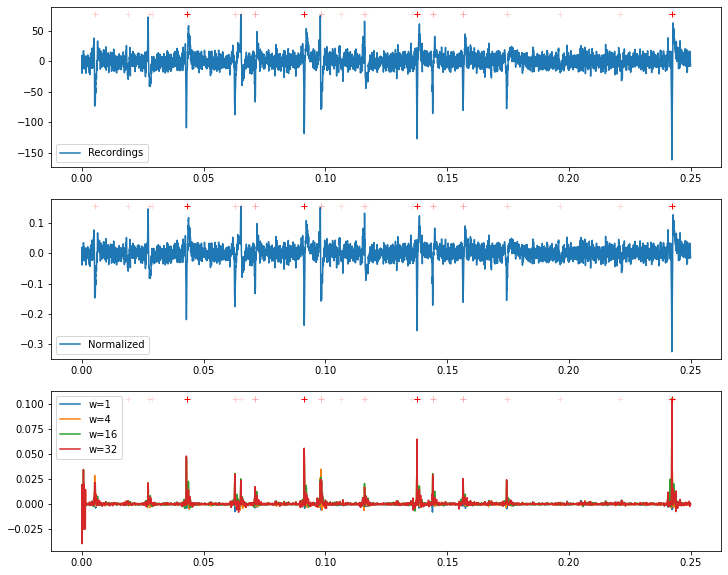

In [38]:
plot_signals(test_neo,channels=[27],crange=range(5000),intensities=amplitudes[27])

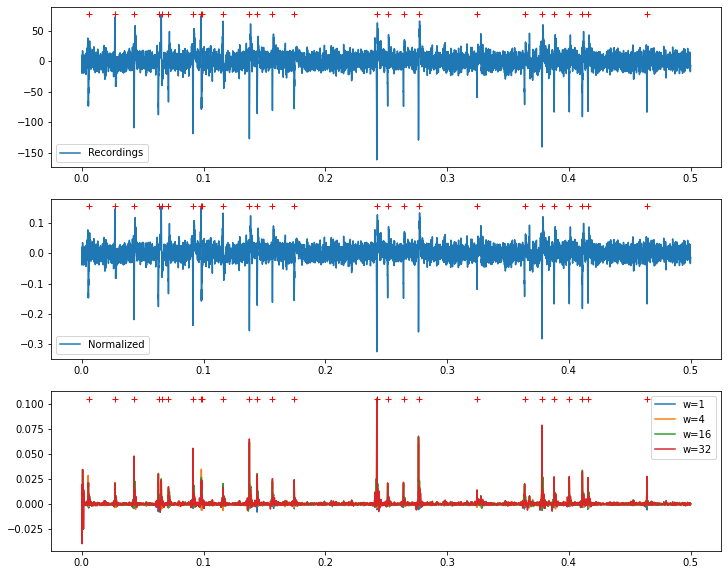

In [42]:
plot_signals(test_neo,channels=[27], crange=range(10000),range_spikes=[0,5,6,7,8])

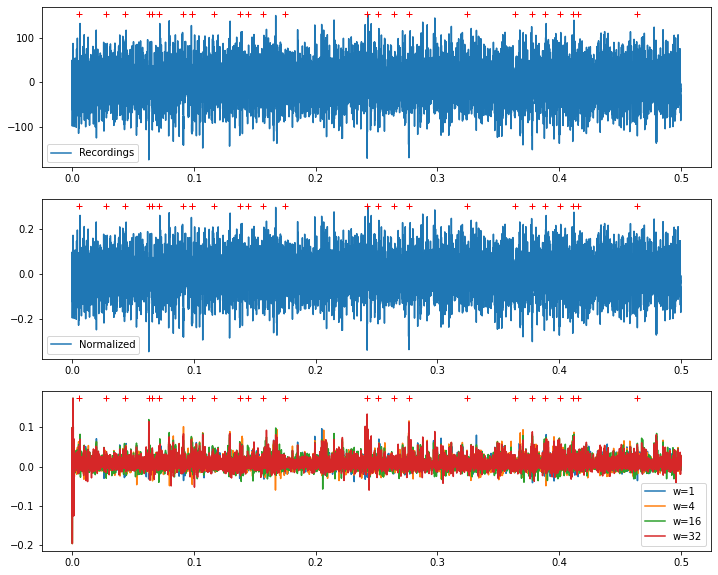

In [43]:
plot_signals(neo_list[1],channels=[27], crange=range(10000),range_spikes=[0,5,6,7,8])

### Frequency components

In [44]:
times = neo_list[1]["recordings"].timestamps
recordings = neo_list[1]["recordings"].recordings[:,:].T
recordings_27ch = recordings[27]

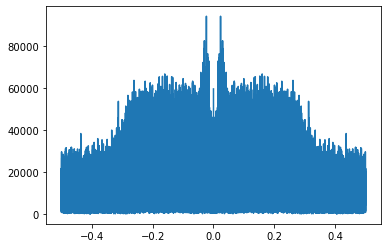

In [48]:
import matplotlib.pyplot as plt
import numpy as np
sp = np.fft.fft(recordings_27ch)
freq = np.fft.fftfreq(times.shape[-1])
plt.plot(freq, np.abs(sp))

In [49]:
times = neo_list[0]["recordings"].timestamps
recordings = neo_list[0]["recordings"].recordings[:,:].T
recordings_27ch = recordings[27]

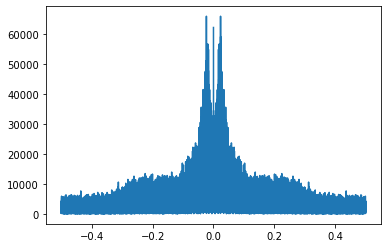

In [50]:
import matplotlib.pyplot as plt
import numpy as np
sp = np.fft.fft(recordings_27ch)
freq = np.fft.fftfreq(times.shape[-1])
plt.plot(freq, np.abs(sp))